<a href="https://colab.research.google.com/github/SubhajitManna-B/Product-Recomendation/blob/main/ProductRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-10-22 15:55:44--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.47MB/s    in 0.6s    

2024-10-22 15:55:45 (1.47 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1  

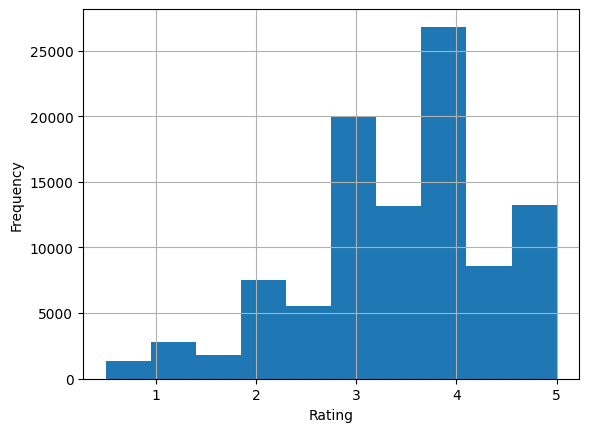

RMSE: 0.8765
RMSE: 0.8764503297710939
Top 10 recommendations for User 28:
MovieId: 318, Estimated Rating: 3.7441321986911413
MovieId: 2329, Estimated Rating: 3.7341649362324807
MovieId: 2571, Estimated Rating: 3.7161172734564927
MovieId: 1210, Estimated Rating: 3.6567451452026445
MovieId: 778, Estimated Rating: 3.5968860591981144
MovieId: 1641, Estimated Rating: 3.5134628522085007
MovieId: 33794, Estimated Rating: 3.5128036057815955
MovieId: 529, Estimated Rating: 3.4913890543855524
MovieId: 356, Estimated Rating: 3.479928528999486
MovieId: 3949, Estimated Rating: 3.465869694776198


In [ ]:
# Install Surprise and necessary libraries
!pip install scikit-surprise

import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy  # Fix the import

# Download and load the dataset
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Explore the dataset
print(ratings.head())
ratings['rating'].hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Build a collaborative filtering model (SVD)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
print(f'RMSE: {accuracy.rmse(predictions)}')  # Fix the accuracy calculation

# Get top 10 recommendations for the first user
def get_top_n_recommendations(predictions, n=10):
    from collections import defaultdict
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n_recommendations(predictions, n=10)
user_id = list(top_n.keys())[0]
print(f"Top 10 recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    print(f"MovieId: {movie_id}, Estimated Rating: {rating}")